In [5]:
!pip install seaborn wordcloud


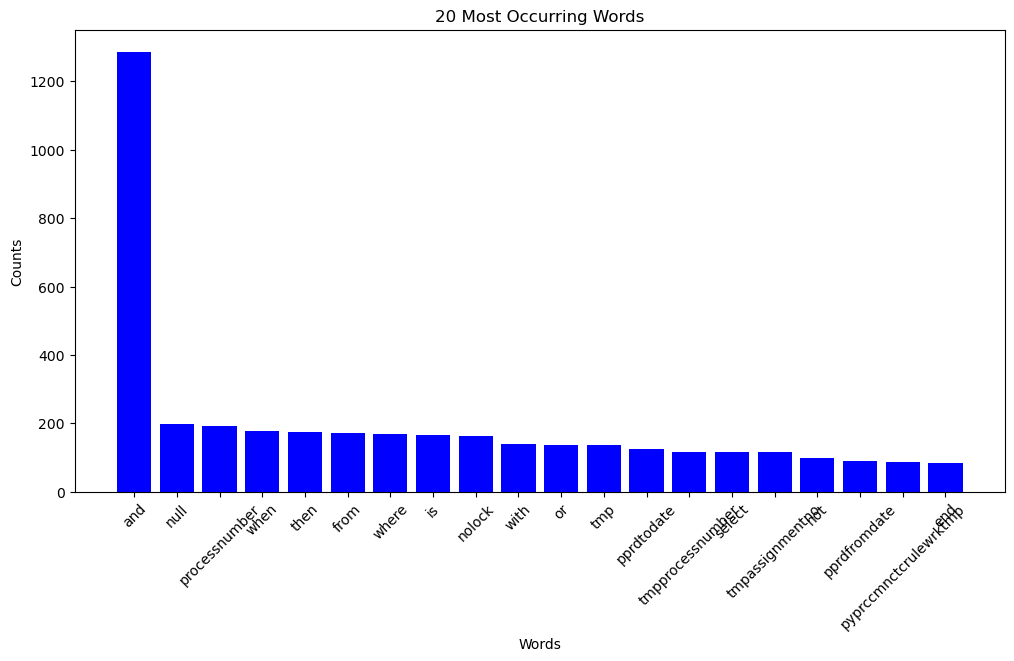

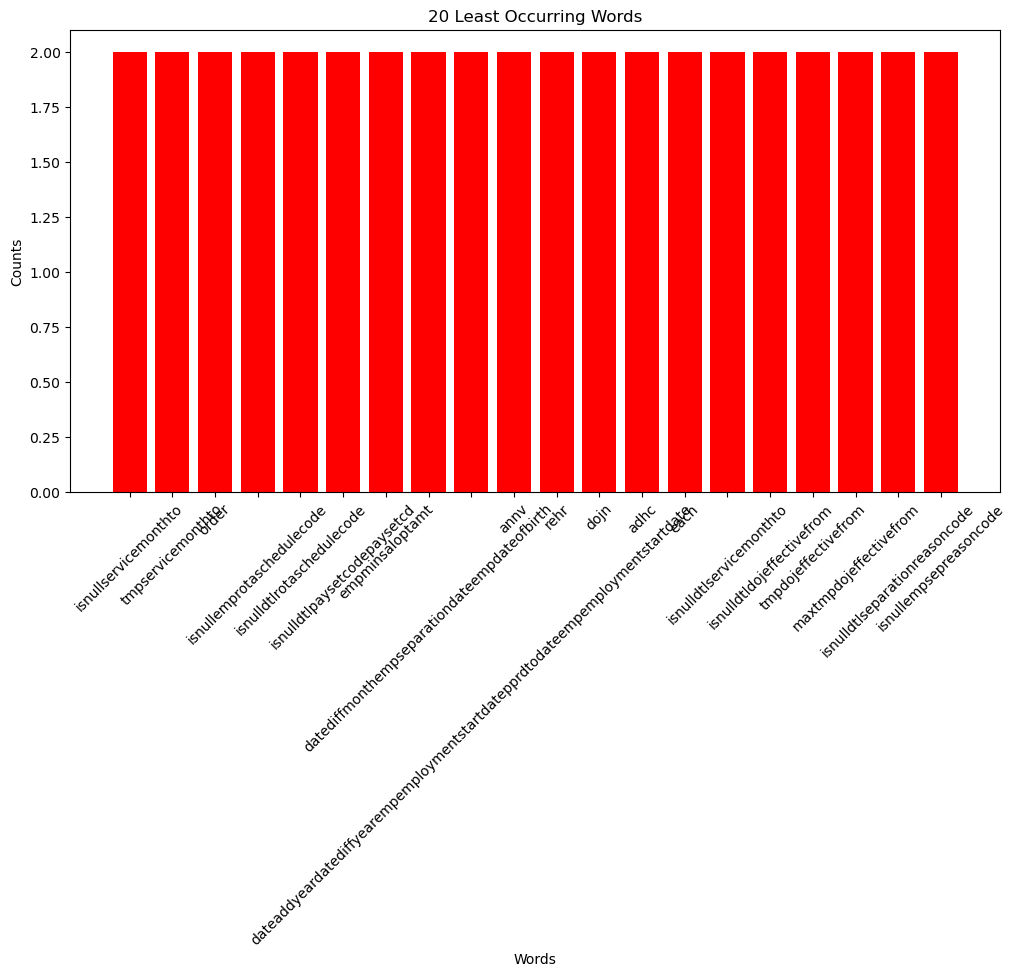

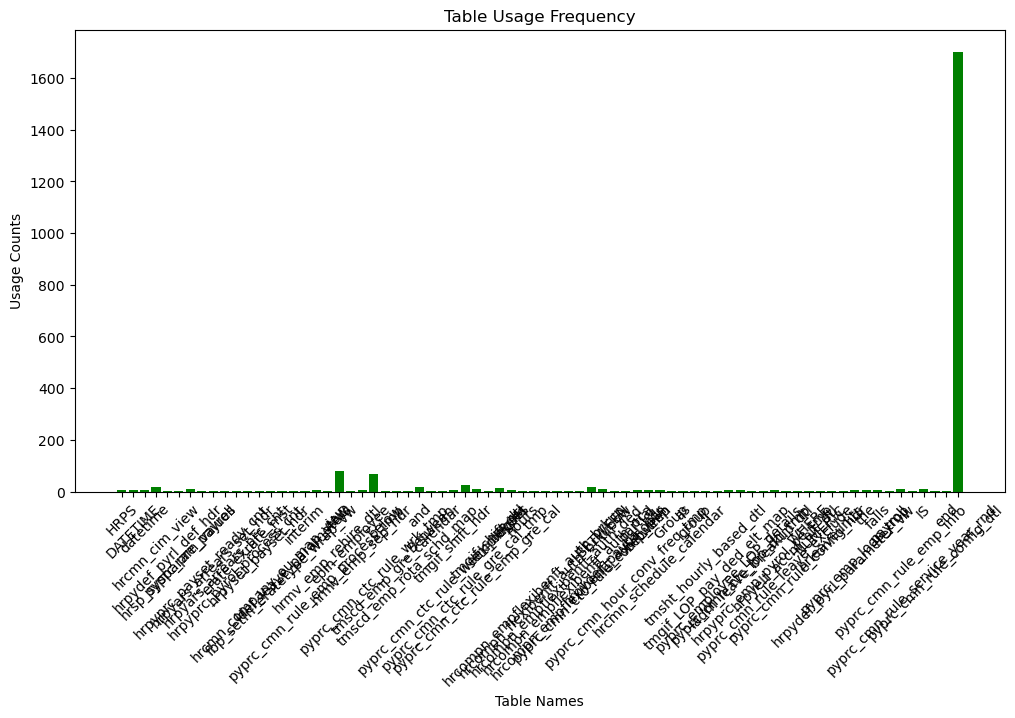

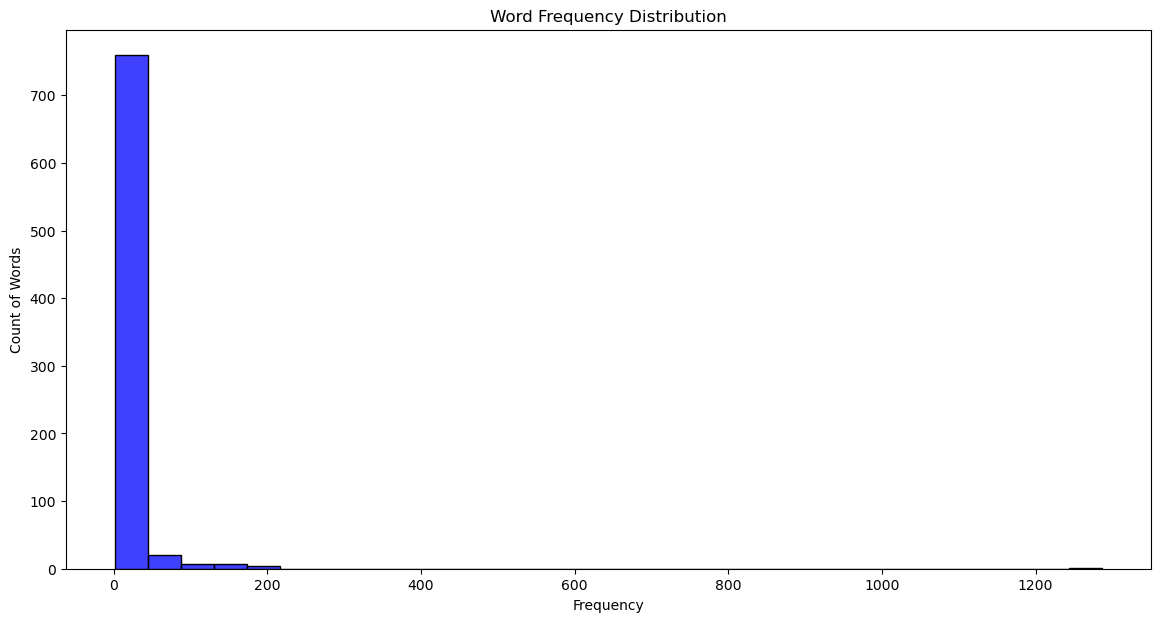

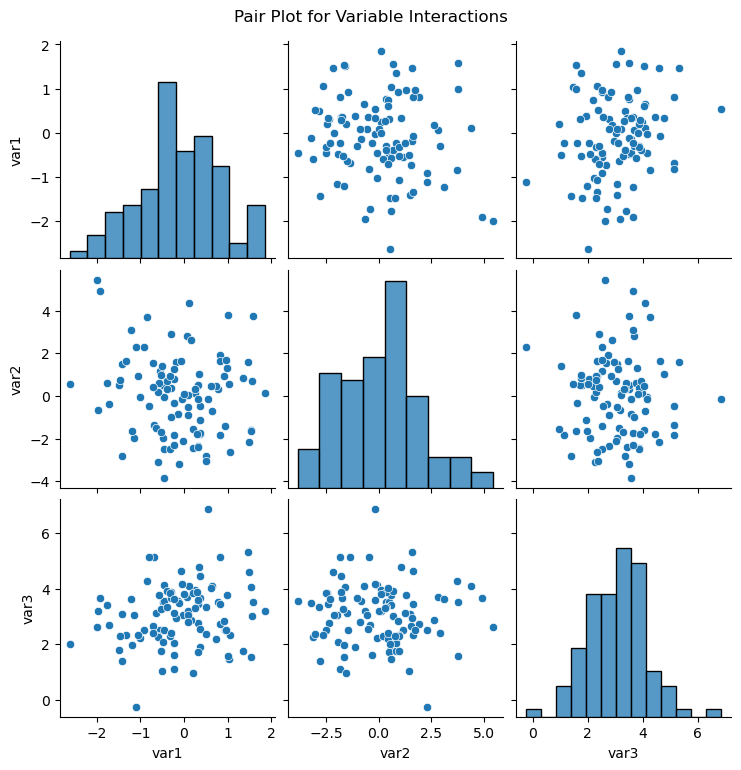

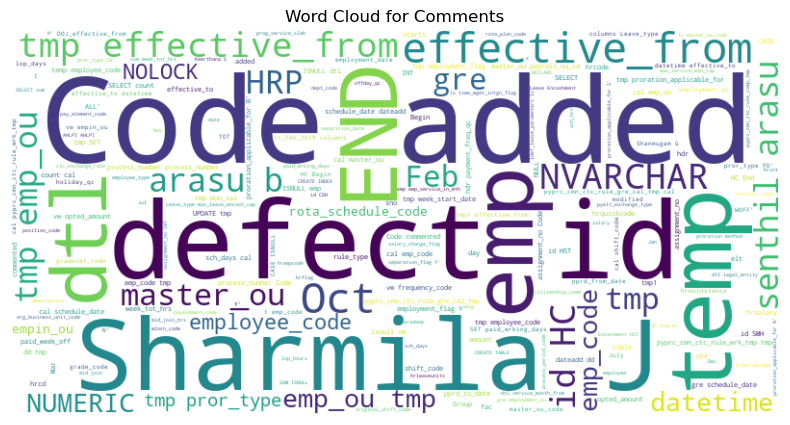

In [13]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

def preprocess_sql(sql_text):
    # Remove multi-line comments
    sql_text = re.sub(r'/\*.*?\*/', '', sql_text, flags=re.DOTALL)
    # Remove single-line comments
    sql_text = re.sub(r'--.*', '', sql_text)
    # Remove special characters and numbers, keep only alphabets and spaces
    sql_text = re.sub(r'[^a-zA-Z\s]', '', sql_text)
    # Convert to lowercase
    sql_text = sql_text.lower()
    # Tokenize into words
    words = sql_text.split()
    return words

def count_words(words):
    return Counter(words)

def filter_words(word_counts, min_count=2):
    return {word: count for word, count in word_counts.items() if count >= min_count}

def plot_word_counts(word_counts, title, color):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color=color)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Load the SQL files
with open('pyprc_cmn_pay_rule_proration_method.sql', 'r', encoding='utf-8', errors='ignore') as file1:
    sql1 = file1.read()

with open('pyprc_hcl_aws_cmn_pay_rule_emp_fetch.sql', 'r', encoding='utf-8', errors='ignore') as file2:
    sql2 = file2.read()

# Preprocess both SQL files
words1 = preprocess_sql(sql1)
words2 = preprocess_sql(sql2)

# Count word occurrences in both files
word_counts1 = count_words(words1)
word_counts2 = count_words(words2)

# Merge the word counts from both files
total_word_counts = word_counts1 + word_counts2

# Filter out words occurring less than 2 times
filtered_word_counts = filter_words(total_word_counts)

# Get the 20 most and least frequent words
most_common_words = Counter(filtered_word_counts).most_common(20)
least_common_words = Counter(filtered_word_counts).most_common()[:-21:-1]

# Plot the 20 most common words
plot_word_counts(most_common_words, '20 Most Occurring Words', 'blue')

# Plot the 20 least common words
plot_word_counts(least_common_words, '20 Least Occurring Words', 'red')

# Step 2: Extract comments, variables, return values, table names, and mathematical formulae
def extract_comments(sql_text):
    comments = re.findall(r'/\*.*?\*/', sql_text, flags=re.DOTALL)
    return comments

def extract_table_names(sql_text):
    tables = re.findall(r'from\s+(\w+)|join\s+(\w+)', sql_text, flags=re.IGNORECASE)
    tables = [table for pair in tables for table in pair if table]
    return tables

def extract_variables(sql_text):
    variables = re.findall(r'@\w+', sql_text)
    return variables

def extract_return_values(sql_text):
    returns = re.findall(r'return\s+@\w+', sql_text, flags=re.IGNORECASE)
    return returns

def extract_mathematical_formulae(sql_text):
    formulae = re.findall(r'[\w@]+\s*[\+\-\*/%]\s*[\w@]+', sql_text)
    return formulae

# Extract details from the first SQL file
comments1 = extract_comments(sql1)
tables1 = extract_table_names(sql1)
variables1 = extract_variables(sql1)
returns1 = extract_return_values(sql1)
formulae1 = extract_mathematical_formulae(sql1)

# Extract details from the second SQL file
comments2 = extract_comments(sql2)
tables2 = extract_table_names(sql2)
variables2 = extract_variables(sql2)
returns2 = extract_return_values(sql2)
formulae2 = extract_mathematical_formulae(sql2)

# Combine results from both files
all_comments = comments1 + comments2
all_tables = tables1 + tables2
all_variables = variables1 + variables2
all_returns = returns1 + returns2
all_formulae = formulae1 + formulae2

# Create a DataFrame to save the extracted data
data = {
    'Comments': all_comments,
    'Table Names': all_tables,
    'Variables': all_variables,
    'Return Values': all_returns,
    'Mathematical Formulae': all_formulae
}

# Normalize the lengths of the lists for DataFrame creation
max_length = max(len(all_comments), len(all_tables), len(all_variables), len(all_returns), len(all_formulae))
for key in data:
    data[key] += [''] * (max_length - len(data[key]))

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
output_path = 'exeldata.xlsx'
df.to_excel(output_path, index=False)

# Additional unique insight: Table usage frequency
table_counts = Counter(all_tables)

# Plot table usage frequency
tables, counts = zip(*table_counts.items())
plt.figure(figsize=(12, 6))
plt.bar(tables, counts, color='green')
plt.xlabel('Table Names')
plt.ylabel('Usage Counts')
plt.title('Table Usage Frequency')
plt.xticks(rotation=45)
plt.show()

# Additional Visualizations

# 1. Word Frequency Distribution
word_freq = pd.DataFrame(filtered_word_counts.items(), columns=['Word', 'Count'])
plt.figure(figsize=(14, 7))
sns.histplot(word_freq['Count'], kde=False, color='blue', bins=30)
plt.title('Word Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count of Words')
plt.show()

# 3. Pair Plot for Variable Interactions
# Generating more varied synthetic data for the pair plot
np.random.seed(42)
variables_data = {
    'var1': np.random.randn(100),
    'var2': np.random.randn(100) * 2,
    'var3': np.random.randn(100) + 3
}
variables_df = pd.DataFrame(variables_data)
sns.pairplot(variables_df)
plt.suptitle('Pair Plot for Variable Interactions', y=1.02)
plt.show()

# 4. Word Cloud for Comments
all_comments_text = ' '.join(all_comments)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()


In [1]:
# Import required libraries
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from flask import Flask, request, send_file

app = Flask(__name__)

def preprocess_sql(sql_text):
    # Remove multi-line comments
    sql_text = re.sub(r'/\*.*?\*/', '', sql_text, flags=re.DOTALL)
    # Remove single-line comments
    sql_text = re.sub(r'--.*', '', sql_text)
    # Remove special characters and numbers, keep only alphabets and spaces
    sql_text = re.sub(r'[^a-zA-Z\s]', '', sql_text)
    # Convert to lowercase
    sql_text = sql_text.lower()
    # Tokenize into words
    words = sql_text.split()
    return words

def count_words(words):
    return Counter(words)

def filter_words(word_counts, min_count=2):
    return {word: count for word, count in word_counts.items() if count >= min_count}

def plot_word_counts(word_counts, title, color):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color=color)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

def extract_comments(sql_text):
    # Extract multi-line comments
    multi_line_comments = re.findall(r'/\*.*?\*/', sql_text, flags=re.DOTALL)
    # Extract single-line comments
    single_line_comments = re.findall(r'--.*', sql_text)
    return multi_line_comments + single_line_comments

def extract_table_names(sql_text):
    tables = re.findall(r'from\s+(\w+)|join\s+(\w+)', sql_text, flags=re.IGNORECASE)
    tables = [table for pair in tables for table in pair if table]
    return tables

def extract_variables(sql_text):
    variables = re.findall(r'@\w+', sql_text)
    return variables

def extract_return_values(sql_text):
    returns = re.findall(r'return\s+@\w+', sql_text, flags=re.IGNORECASE)
    return returns

def extract_mathematical_formulae(sql_text):
    formulae = re.findall(r'[\w@]+\s*[+\-*/%]\s*[\w@]+', sql_text)
    return formulae

@app.route('/process', methods=['GET', 'POST'])
def process_sql_files():
    if request.method == 'POST':
        # Load the uploaded SQL files
        file1 = request.files['file1']
        file2 = request.files['file2']

        # Save the files temporarily
        file1.save('data/pyprc_cmn_pay_rule_proration_method.sql')
        file2.save('data/pyprc_hcl_aws_cmn_pay_rule_emp_fetch.sql')

        # Read SQL files
        with open('data/pyprc_cmn_pay_rule_proration_method.sql', 'r', encoding='utf-8', errors='ignore') as f1:
            sql1 = f1.read()
        with open('data/pyprc_hcl_aws_cmn_pay_rule_emp_fetch.sql', 'r', encoding='utf-8', errors='ignore') as f2:
            sql2 = f2.read()

        # Preprocess SQL files
        words1 = preprocess_sql(sql1)
        words2 = preprocess_sql(sql2)

        # Count word occurrences
        word_counts1 = count_words(words1)
        word_counts2 = count_words(words2)

        # Merge word counts
        total_word_counts = word_counts1 + word_counts2

        # Filter out words occurring less than 2 times
        filtered_word_counts = filter_words(total_word_counts)

        # Get the 20 most and least frequent words
        most_common_words = Counter(filtered_word_counts).most_common(20)
        least_common_words = Counter(filtered_word_counts).most_common()[:-21:-1]

        # Plot the 20 most common words
        plot_word_counts(most_common_words, '20 Most Occurring Words', 'blue')

        # Plot the 20 least common words
        plot_word_counts(least_common_words, '20 Least Occurring Words', 'red')

        # Extract details from SQL files
        comments1 = extract_comments(sql1)
        tables1 = extract_table_names(sql1)
        variables1 = extract_variables(sql1)
        returns1 = extract_return_values(sql1)
        formulae1 = extract_mathematical_formulae(sql1)

        comments2 = extract_comments(sql2)
        tables2 = extract_table_names(sql2)
        variables2 = extract_variables(sql2)
        returns2 = extract_return_values(sql2)
        formulae2 = extract_mathematical_formulae(sql2)

        # Combine results from both files
        all_comments = comments1 + comments2
        all_tables = tables1 + tables2
        all_variables = variables1 + variables2
        all_returns = returns1 + returns2
        all_formulae = formulae1 + formulae2

        # Create a DataFrame to save the extracted data
        data = {
            'Comments': all_comments,
            'Table Names': all_tables,
            'Variables': all_variables,
            'Return Values': all_returns,
            'Mathematical Formulae': all_formulae
        }

        # Normalize the lengths of the lists for DataFrame creation
        max_length = max(len(all_comments), len(all_tables), len(all_variables), len(all_returns), len(all_formulae))
        for key in data:
            data[key] += [''] * (max_length - len(data[key]))

        df = pd.DataFrame(data)

        # Save the DataFrame to an Excel file
        output_path = 'output.xlsx'
        df.to_excel(output_path, index=False)

        # 2. Pair Plot for Variable Interactions
        np.random.seed(42)
        variables_data = {
            'var1': np.random.randn(100),
            'var2': np.random.randn(100) * 2,
            'var3': np.random.randn(100) + 3
        }
        variables_df = pd.DataFrame(variables_data)
        sns.pairplot(variables_df)
        plt.suptitle('Pair Plot for Variable Interactions', y=1.02)
        plt.show()

        # 3. Word Cloud for Comments
        all_comments_text = ' '.join(all_comments)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Comments')
        plt.show()

        # Return the generated Excel file as a download
        return send_file(output_path, as_attachment=True)

    return '''
    <!doctype html>
    <title>Upload SQL Files</title>
    <h1>Upload two SQL files to process</h1>
    <form method=post enctype=multipart/form-data>
      <input type=file name=file1>
      <input type=file name=file2>
      <input type=submit value=Upload>
    </form>
    '''

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

Y:\anaco\Lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
